<a href="https://colab.research.google.com/github/ethanwarriner/Suicide-Rates-EDA/blob/main/Suicide_Rates_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Analyzing the Impact on Suicide Rates by Age, Race, and Sex**

## **Introduction**

> This analysis explores the relationship between the number of suicides over time and defining traits of the victims, such as age, race, and sex.

> While looking at a data set that kept track of the suicide rates for males and females across all ages and races in the United States over the past couple decades, I wondered if there was any correlation. I asked: Does age, sex, and race determine how many suicides will occur? Are certain races more prone to suicide than others? What, if any, social and/or cultural factors contribute to these factors?

> Understanding theses questions is crucial so that pschologists, mental health experts, and the global community can help find long-term solutions, offering support to those most at risk. It's about understanding why the victim was struggling so deeply that it led them to taking their own life, and aiming to prevent these tragedies that strike so many families.

<img src="https://www.dea.gov/sites/default/files/styles/large/public/2023-09/Ribbon-1.png?h=8bf64f20&itok=WNNQhI22" width=300 height=auto>

## **Data Collection**

In [2]:
import pandas as panda
import matplotlib.pyplot as plot
import seaborn as sns

df = panda.read_csv("/content/drive/MyDrive/SuicideRates.csv")

## **Data Cleaning**

In [3]:
columns_to_drop = ['UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM']
df = df.drop(columns=columns_to_drop)

## **Analyses**

### Male Distributions

I will show the distribution of males by race for all ages in 2000, 2005, 2010, and 2015.



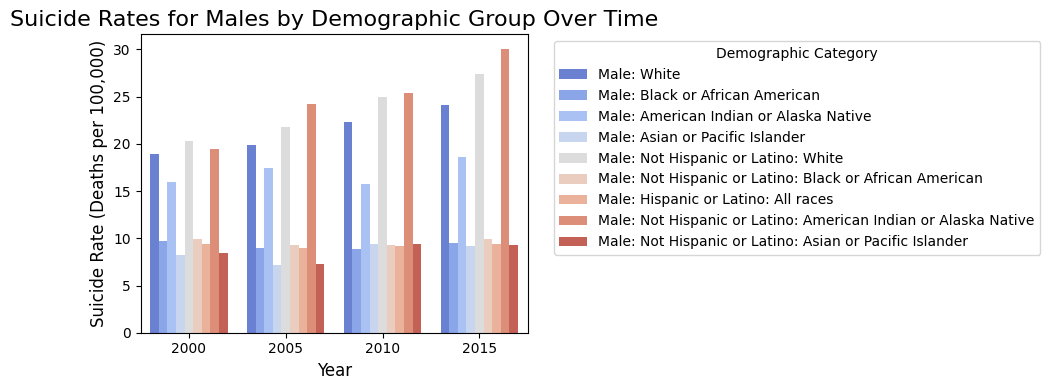

In [4]:
male_races = [
    'Male: White',
    'Male: Black or African American',
    'Male: American Indian or Alaska Native',
    'Male: Asian or Pacific Islander',
    'Male: Not Hispanic or Latino: American Indian or Alaska Native',
    'Male: Not Hispanic or Latino: Asian or Pacific Islander',
    'Male: Hispanic or Latino: All races',
    'Male: Not Hispanic or Latino: White',
    'Male: Not Hispanic or Latino: Black or African American',
    'Male: Not Hispanic or Latino: Asian',
    'Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander'
]

df_males_races = df[df['STUB_LABEL'].isin(male_races)]
years_of_interest = [2000, 2005, 2010, 2015]
df_males_races = df_males_races[df_males_races['YEAR'].isin(years_of_interest)]

plot.figure(figsize=(10, 4))

sns.barplot(
    data=df_males_races,
    x='YEAR',
    y='ESTIMATE',
    hue='STUB_LABEL',
    errorbar=None,
    palette='coolwarm'
)

plot.title('Suicide Rates for Males by Demographic Group Over Time', fontsize=16)
plot.xlabel('Year', fontsize=12)
plot.ylabel('Suicide Rate (Deaths per 100,000)', fontsize=12)
plot.legend(title='Demographic Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plot.tight_layout()
plot.show()

In [5]:
male_data = df[df['STUB_LABEL'].isin(male_races)]
years_of_interest = [2000, 2005, 2010, 2015]
male_data = male_data[male_data['YEAR'].isin(years_of_interest)]
summary_by_year_and_race = male_data.groupby(['YEAR', 'STUB_LABEL']).agg({
    'ESTIMATE': ['mean', 'median', 'std', 'count']
})

pivot_summary = summary_by_year_and_race['ESTIMATE']['mean'].unstack(level=0)
pivot_summary['Total Mean'] = pivot_summary.mean(axis=1)

pivot_summary = pivot_summary.round(2)

panda.set_option('display.max_columns', None)
panda.set_option('display.width', 1000)

print(pivot_summary)

YEAR                                                 2000   2005   2010   2015  Total Mean
STUB_LABEL                                                                                
Male: American Indian or Alaska Native              15.95  17.45  15.80  18.65       16.96
Male: Asian or Pacific Islander                      8.25   7.20   9.40   9.15        8.50
Male: Black or African American                      9.70   8.95   8.90   9.50        9.26
Male: Hispanic or Latino: All races                  9.35   9.00   9.20   9.45        9.25
Male: Not Hispanic or Latino: American Indian o...  19.50  24.25  25.35  30.10       24.80
Male: Not Hispanic or Latino: Asian or Pacific ...   8.40   7.30   9.40   9.30        8.60
Male: Not Hispanic or Latino: Black or African ...   9.90   9.25   9.25   9.90        9.57
Male: Not Hispanic or Latino: White                 20.30  21.75  24.95  27.45       23.61
Male: White                                         18.95  19.85  22.30  24.10       21.30

Now I will show the distribution of males by age for all races in 2000, 2005, 2010, and 2015.

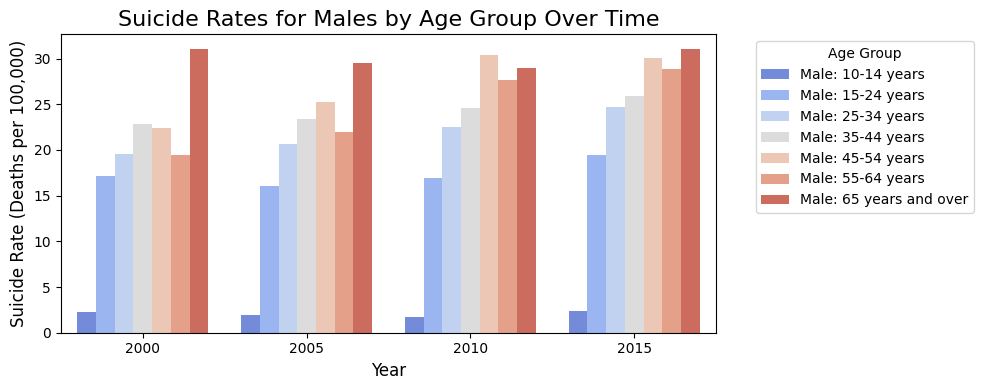

In [6]:
male_ages = [
    'Male: 10-14 years',
    'Male: 15-24 years',
    'Male: 25-34 years',
    'Male: 35-44 years',
    'Male: 45-54 years',
    'Male: 55-64 years',
    'Male: 65 years and over',
]

df_males_ages = df[df['STUB_LABEL'].isin(male_ages)]
years_of_interest = [2000, 2005, 2010, 2015]
df_males_ages = df_males_ages[df_males_ages['YEAR'].isin(years_of_interest)]

plot.figure(figsize=(10, 4))

sns.barplot(
    data=df_males_ages,
    x='YEAR',
    y='ESTIMATE',
    hue='STUB_LABEL',
    errorbar=None,
    palette='coolwarm'
)

plot.title('Suicide Rates for Males by Age Group Over Time', fontsize=16)
plot.xlabel('Year', fontsize=12)
plot.ylabel('Suicide Rate (Deaths per 100,000)', fontsize=12)
plot.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plot.tight_layout()
plot.show()

In [7]:
male_data = df[df['STUB_LABEL'].isin(male_ages)]
years_of_interest = [2000, 2005, 2010, 2015]
male_data = male_data[male_data['YEAR'].isin(years_of_interest)]
summary_by_year_and_race = male_data.groupby(['YEAR', 'STUB_LABEL']).agg({
    'ESTIMATE': ['mean', 'median', 'std', 'count']
})

pivot_summary = summary_by_year_and_race['ESTIMATE']['mean'].unstack(level=0)
pivot_summary['Total Mean'] = pivot_summary.mean(axis=1)

pivot_summary = pivot_summary.round(2)

panda.set_option('display.max_columns', None)
panda.set_option('display.width', 1000)

print(pivot_summary)

YEAR                     2000  2005  2010  2015  Total Mean
STUB_LABEL                                                 
Male: 10-14 years         2.3   1.9   1.7   2.4        2.07
Male: 15-24 years        17.1  16.1  16.9  19.4       17.38
Male: 25-34 years        19.6  20.6  22.5  24.7       21.85
Male: 35-44 years        22.8  23.4  24.6  25.9       24.18
Male: 45-54 years        22.4  25.2  30.4  30.1       27.02
Male: 55-64 years        19.4  22.0  27.7  28.9       24.50
Male: 65 years and over  31.1  29.5  29.0  31.0       30.15


### Female Distributions

I will show the distribution of females by race for all ages in 2000, 2005, 2010, and 2015.

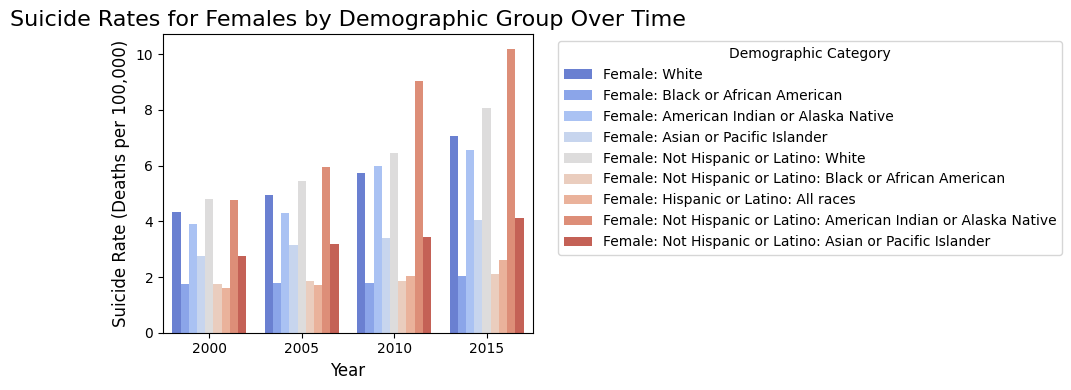

In [8]:
female_races = [
    'Female: White',
    'Female: Black or African American',
    'Female: American Indian or Alaska Native',
    'Female: Asian or Pacific Islander',
    'Female: Not Hispanic or Latino: American Indian or Alaska Native',
    'Female: Not Hispanic or Latino: Asian or Pacific Islander',
    'Female: Hispanic or Latino: All races',
    'Female: Not Hispanic or Latino: White',
    'Female: Not Hispanic or Latino: Black or African American',
    'Female: Not Hispanic or Latino: Asian',
    'Female: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander'
]

df_female_races = df[df['STUB_LABEL'].isin(female_races)]
years_of_interest = [2000, 2005, 2010, 2015]
df_female_races = df_female_races[df_female_races['YEAR'].isin(years_of_interest)]

plot.figure(figsize=(10, 4))

sns.barplot(
    data=df_female_races,
    x='YEAR',
    y='ESTIMATE',
    hue='STUB_LABEL',
    errorbar=None,
    palette='coolwarm'
)

plot.title('Suicide Rates for Females by Demographic Group Over Time', fontsize=16)
plot.xlabel('Year', fontsize=12)
plot.ylabel('Suicide Rate (Deaths per 100,000)', fontsize=12)
plot.legend(title='Demographic Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plot.tight_layout()
plot.show()

In [9]:
female_data = df[df['STUB_LABEL'].isin(female_races)]
years_of_interest = [2000, 2005, 2010, 2015]
female_data = female_data[female_data['YEAR'].isin(years_of_interest)]
summary_by_year_and_race = female_data.groupby(['YEAR', 'STUB_LABEL']).agg({
    'ESTIMATE': ['mean', 'median', 'std', 'count']
})

pivot_summary = summary_by_year_and_race['ESTIMATE']['mean'].unstack(level=0)
pivot_summary['Total Mean'] = pivot_summary.mean(axis=1)

pivot_summary = pivot_summary.round(2)

panda.set_option('display.max_columns', None)
panda.set_option('display.width', 1000)

print(pivot_summary)

YEAR                                                2000  2005  2010   2015  Total Mean
STUB_LABEL                                                                             
Female: American Indian or Alaska Native            3.90  4.30  6.00   6.55        5.19
Female: Asian or Pacific Islander                   2.75  3.15  3.40   4.05        3.34
Female: Black or African American                   1.75  1.80  1.80   2.05        1.85
Female: Hispanic or Latino: All races               1.60  1.70  2.05   2.60        1.99
Female: Not Hispanic or Latino: American Indian...  4.75  5.95  9.05  10.20        7.49
Female: Not Hispanic or Latino: Asian or Pacifi...  2.75  3.20  3.45   4.10        3.38
Female: Not Hispanic or Latino: Black or Africa...  1.75  1.85  1.85   2.10        1.89
Female: Not Hispanic or Latino: White               4.80  5.45  6.45   8.05        6.19
Female: White                                       4.35  4.95  5.75   7.05        5.52


Now I will show the distribution of females by age for all races in 2000, 2005, 2010, and 2015.

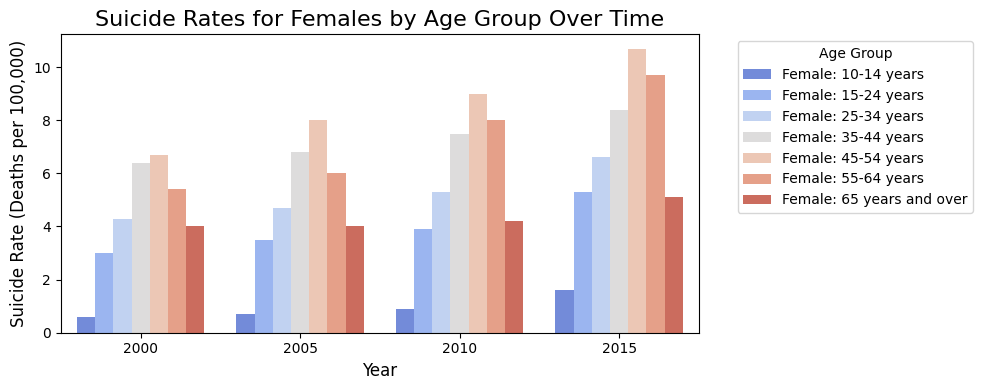

In [10]:
female_ages = [
    'Female: 10-14 years',
    'Female: 15-24 years',
    'Female: 25-34 years',
    'Female: 35-44 years',
    'Female: 45-54 years',
    'Female: 55-64 years',
    'Female: 65 years and over',
]

df_female_ages = df[df['STUB_LABEL'].isin(female_ages)]
years_of_interest = [2000, 2005, 2010, 2015]
df_female_ages = df_female_ages[df_female_ages['YEAR'].isin(years_of_interest)]

plot.figure(figsize=(10, 4))

sns.barplot(
    data=df_female_ages,
    x='YEAR',
    y='ESTIMATE',
    hue='STUB_LABEL',
    errorbar=None,
    palette='coolwarm'
)

plot.title('Suicide Rates for Females by Age Group Over Time', fontsize=16)
plot.xlabel('Year', fontsize=12)
plot.ylabel('Suicide Rate (Deaths per 100,000)', fontsize=12)
plot.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plot.tight_layout()
plot.show()

In [11]:
female_data = df[df['STUB_LABEL'].isin(female_ages)]
years_of_interest = [2000, 2005, 2010, 2015]
female_data = female_data[female_data['YEAR'].isin(years_of_interest)]
summary_by_year_and_race = female_data.groupby(['YEAR', 'STUB_LABEL']).agg({
    'ESTIMATE': ['mean', 'median', 'std', 'count']
})

pivot_summary = summary_by_year_and_race['ESTIMATE']['mean'].unstack(level=0)
pivot_summary['Total Mean'] = pivot_summary.mean(axis=1)

pivot_summary = pivot_summary.round(2)

panda.set_option('display.max_columns', None)
panda.set_option('display.width', 1000)

print(pivot_summary)

YEAR                       2000  2005  2010  2015  Total Mean
STUB_LABEL                                                   
Female: 10-14 years         0.6   0.7   0.9   1.6        0.95
Female: 15-24 years         3.0   3.5   3.9   5.3        3.92
Female: 25-34 years         4.3   4.7   5.3   6.6        5.22
Female: 35-44 years         6.4   6.8   7.5   8.4        7.28
Female: 45-54 years         6.7   8.0   9.0  10.7        8.60
Female: 55-64 years         5.4   6.0   8.0   9.7        7.28
Female: 65 years and over   4.0   4.0   4.2   5.1        4.32


## **Discussion**


Let's examine our findings for **males**:

(Numbers have been rounded to nearest whole number)

* Not Hispanic or Latino: White males have the highest average rate at 24 deaths, then White males at 21 deaths. The rate of American Indian males is the highest at 30 deaths in 2015, while Asian or Pacific Islander males have the lowest rate 9 deaths in 2015.

* Rates have risen for Not Hispanic or Latino: White and American Indian males, from around 20 deaths in 2000 to 30 deaths in 2015. Other races, like Black or African American and Hispanic or Latino, show more stable rates around 9-10.

* Older males (55-64, 65+) have high and stable rates, with 65 and over at 30 deaths. The youngest (10-14) has the lowest rate at 2 deaths, increasing slightly over time.


Now, let's examine our findings for **females**:

* Not Hispanic or Latino: White females have the highest average rate at 6 deaths, while Black or African American and Hispanic or Latino females have rates around 2-3 deaths. Asian or Pacific Islander females have the lowest at 3 deaths.

* Rates have increased for Not Hispanic or Latino: White females (from 5 deaths in 2000 to 8 deaths in 2015), while Black or African American females show only slight increases.

* Older age groups (65+) have the highest rates for females, with **65+** at 4 deaths. Younger groups (10-14 and 15-24) show stable or slightly increasing rates.


#### What does it mean?

* Race has played a significant role in the number of suicides, with white males and females depicting the highest rates over time. This can be attributed to lack of mental health services and awareness.

* Age also plays a major role, as suicide rates generally increase with age. This could indicate that older people may face more life stressors or mental health hurdles that contribute to higher suicide rates. The lower suicide rates among younger people might point to younger kids just not having nearly as much stress as adults.

* The overall increase in suicide rates over the years is disconcerting, specifically for age groups like males and white females. The rise in suicide rates for older age groups may reflect worsening mental health among seniors. On the other hand, the relatively stable rates in younger age groups could suggest that prevention efforts in these groups are having somewhat of a positive effect.

* These findings underline the importance of suicide prevention strategies for older adults, as well as interventions for certain racial groups that display higher risks. The increase in suicide rates as a whole calls for better mental health support across all demographics.